<h1 style = "text-align: center">ISAT341- Machine Learning and Data Science</h1>
<h2 style = "text-align:center">Lab 3- Multivariate Linear Regression with Imported Data </h2>
<img src = "Images/machine_learning.jpg" width = 200; height=200>
<h2 style = "text-align: center"> Multiple Variable Linear Regression (The Diabetes Dataset)<h2>

<p style = "text-align:center"> Brian La Rosa <p>

<h2 style = "text-align:center"> 
    <br>
Lab 3 - Multivariate Linear Regression (Data Modeling and Fitting with Imported Data)
    
## <ins>Objectives</ins>
-Create and use Machine Learning Models with SciKit Learn
- Learn more advanced NumPy (Numerical Python) features
- Learn how import data for remote website (UCI Datasets)
- Learn how to import and use SciKit Learn built-in datasets (Diabetes)
- Perform Multiple Regression Analysis with SciKit Learn
- Train-Test Split of data with SciKit Learn
- Create Predictive Models
- Perform 3D Plotting with MatPlotLib
- Preform Model Evaluation
- Model Score and Accuracy

## <ins>Introduction</ins>
 In the previous lab we moved from the simple linear regression model with one predictor to a
multiple linear regression model with two or more predictors. This multivariable linear
regression problem fitted a 2D surface to a dataset generated by the built-in SciKit Learn
dataset generator. We used an ordinary least squares regression function, which solves
mathematical problems of the form

<h2 style="text-align:right; color:red;">

$\mathop {\min }\limits_\omega \;\left\| {X\omega - y} \right\|$

</h2>

<p> where w is the set of coefficients. The number of coefficients depends on the number of
dimensions in the data, N(coeff) =MD − 1, where M >1 and is an integer.
In the multiple regression setting, because of the potentially large number of predictors, it is
more efficient to use matrices to define the regression model and the subsequent analyses. In future lessons we will considers some of the more important multiple regression formulas in
matrix form. <p>

<p>Our predictor after the regression fit was then of the form<p>

| Age      | Sex | Body Mass Index  | Average Blood Pressure |S1   |S2   |S3    |S4   |S5   |S6   |
| :---    |:---|          :---   |:---                   |:---|:---| :---|:---|:---|:---|
|          |     |                  |                        |     |     |      |     |     |     |     
|          |     |                  |                        |     |     |      |     |     |     |       

In [1]:
import pandas as pd
import requests
import io
url="https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt"
s=requests.get(url).text
df=pd.read_table(io.StringIO(s))

## Part 1: Model Building in Ski-Kit Learn

In [2]:
%matplotlib inline 
import numpy as np


In [3]:
#Load the diabetes dataset
from sklearn import datasets, linear_model
diabetes = datasets.load_diabetes()

#The diabetes dataset is stored as python dictionary (key: value parts) with two keys 'target' and 'data'
# the value of the 'target' key is an 442 x 1 array and the value of the 'data' data key is 442 x 10 array. 

# Store the feature matrix (X) and response vector (y)
X=diabetes.data
y=diabetes.target
print(diabetes.keys())

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


<p> <b>"Features"</b> are also knows as predictors, inputs, or attributes. The <b>"response"</b> is also knows as the target, label, or output. </p>

In [4]:
#The x shape is is 442 x 10 and the y shape is only (442,)
print(X.shape)
print(y.shape)

(442, 10)
(442,)


## <ins> More pandas to handle our Data </ins>
<p> <b> "observations"</b> are also known as samples, instances, or records.

In [5]:
# examine the first 5 rows of the feature matrix (note: we are creating and including the feature names here)
import pandas as pd 
pd.DataFrame(X, columns= ['Age', 'Sex', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']).tail()

,Age,Sex,BMI,BP,S1,S2,S3,S4,S5,S6
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930
441,-0.045472,-0.044642,-0.073030,-0.081413,0.083740,0.027809,0.173816,-0.039493,-0.004222,0.003064


In [6]:
#examine correlation of features
df=pd.DataFrame(X, columns = ['Age', 'Sex', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6'])
df.corr()

,Age,Sex,BMI,BP,S1,S2,S3,S4,S5,S6
Age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731
Sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133
BMI,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680
BP,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430
S1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717
S2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600
S3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
S4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212
S5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669
S6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000


<p>In order to <b> build a model </b>, the features must be <b> numeric </b>, and every observation must have the <b> same features in the same order</b>. Let's build a model using only two features from the <b>BMI</b> and <b>BP</b>.

In [7]:
#use only two features of BMI and BP
features = (2,3)
X=X[:, features]

<p><b>We first need to train the machine learning algorithm so split X and y into X_train, X_test, y_train, and y_test using the SciKitLearn function train_test_split().</b>  
 <br>
Ski kit learn has a function that randomely shuffles the data and splits it into training and test data. The function is called <b>train_test_split </b> and by default (<i>unless you override the hyperparemeters)</i> will split with <b> 75% of the rows being used for training data and 25% used for test data  

In [8]:
#from sklearn.model to import train_test_split()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size =.25, random_state=0)

<p>The output of the split is shown below where I split the data with <b>75% of the rows being used for training data and 25% be used for testing data </b> <i> and is purposefully put in the hyperparemeter test_size = .25 for illustrative purposese only.</i> The parameter <b>Random_state</b> is the seed for the psuedo-random number generator. Use the same seed so that you get the same results every run. 

In [9]:
#exmine the training data
print('X train.shape: {}'.format(X_train.shape))
print('y train.shape: {}'.format(y_train.shape))

print('X test.shape: {}'.format(X_test.shape))
print('y test.shape: {}'.format(y_test.shape))

X train.shape: (331, 2)
y train.shape: (331,)
X test.shape: (111, 2)
y test.shape: (111,)


array([[<Axes: xlabel='BMI', ylabel='BMI'>,
        <Axes: xlabel='BP', ylabel='BMI'>],
       [<Axes: xlabel='BMI', ylabel='BP'>,
        <Axes: xlabel='BP', ylabel='BP'>]], dtype=object)

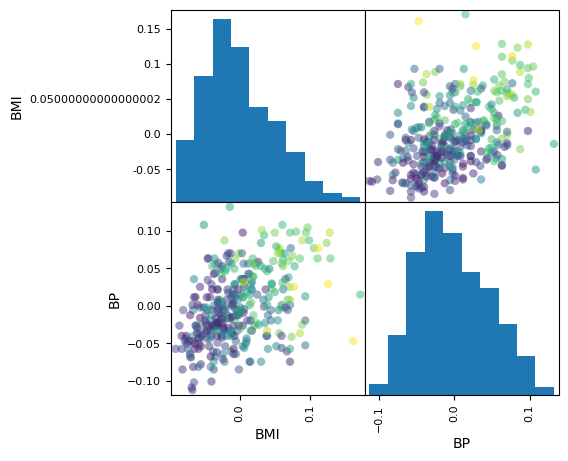

In [10]:
#Create a pandas dataframe for plotting our data
diabetes_dataframe = pd.DataFrame(X_train, columns =['BMI', 'BP'])

pd.plotting.scatter_matrix(diabetes_dataframe, c=y_train, figsize=(5,5), marker='o', hist_kwds={'bins':10})

## <ins> Creating a Predictive Model </ins>
<p> Let's Build the model by instaniating the LinearRegression() method and calling the model's fit function. 

In [11]:
#Instaniate the model with default parameters (i.e. create an instance of the model)
# this is ordinary least squares regression DLS
regr = linear_model.LinearRegression()

#training the model (i.e. fit the model with training data)
regr.fit(X_train, y_train)

#printing the coefficients 
print(regr.coef_)

[855.51304985 383.24036138]


### Making Predictions 

<p>Now that that model has been trained. We can now use the model to make predictions on <b> new data</b> for which we might not know the correct outcomes, i.e. the y-values. In order to <b> make a prediction </b>, the new observation must have the <b> same features as the training observations.</b>, both in numbers and meaning. 

In [12]:
#predicting y-value based on the training. We input a normalized list of BMI and BP data. 
X_new=np.array([0.019662, 0.059744]) #using patient number 437
X_new=np.reshape(X_new, (1,-1))
print('X_new Shape: {}'.format(X_new.shape))

X_new Shape: (1, 2)


<p> To make a prediction, we call the predict method of regr. </p>

In [13]:
#I plotted S1 and S2 and the models test set accuracy was only 3.29% 149.57 prediction and 178 as the true value. 
#When building a predictive model for S3 and S4, the test set accuracy was 13.73%
prediction = regr.predict(X_new)[0]
print('Prediction from model is: {0:.2f}'.format(prediction))
print('True value from dataset is: {0:.2f}'.format(y[437]))

Prediction from model is: 193.10
True value from dataset is: 178.00


In [14]:
print("The models test set accuracy is {0:.2f}%".format(100*regr.score(X_test, y_test)))

The models test set accuracy is 24.62%


## The Multivariate Model Equation

In [15]:
#get the regression coefficients
#printing the coeficients
coef0=regr.coef_[0]
coef1=regr.coef_[1]
intercept = regr.intercept_

print('The coefficient of the feature BMI is {}'.format(coef0))
print('The coefficient of the feature BP is {}'.format(coef1))
print('The intecept has the value of is {}'.format(intercept))

The coefficient of the feature BMI is 855.5130498501966
The coefficient of the feature BP is 383.2403613816734
The intecept has the value of is 153.38210506955372


#### Build the model equation and test it for the values indicated in the document. 
<br>
<h3 style="color:orange">y = [855.51] * BMI + [383.24] * BP + 153.38

<p>whre y is a quantitive measure of disease(diabetes) progression one year after baseline.</p>

#### Use our model equation with data to predict disease's progression

In [16]:
#use some values from above for patient 437
BMI, BP =0.185085, 0.335428
y=855.51 * BMI + 383.24 * BP + 153.38
print('Prediction from the model equation is:{0:.2f}'.format(y))

Prediction from the model equation is:440.27


### <ins> Creating 3D Plots with MatPlotLib</ins>
<br>
<b><font color = 'green'> Plot the training and testing data on the fitted surface

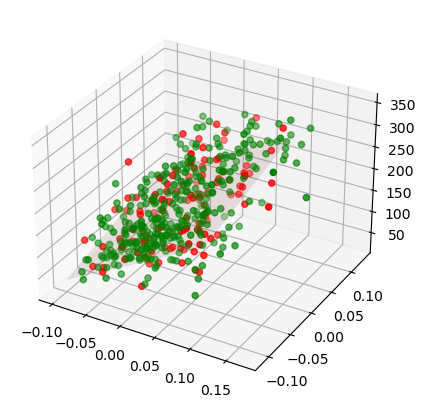

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#Define an inline function(using lambda) with coefficient variables
#returned from the regression analysis.
coef = regr.coef_
intercept = regr.intercept_
line = lambda x1, x2,: coef[0]*x1 + coef[1]*x2 +intercept

#plotting 
fig = plt.figure(figsize=(8,5))
grid_x1, grid_x2 = np.mgrid[-.1:.1:10j, -.1:.1:10j]

#ax - fig.addsubplot(111,projection-'3d')
ax = Axes3D(fig)
ax = plt.axes(projection='3d')
ax.scatter(X_train[:,0], X_train[:,1], y_train, color = 'green')
ax.scatter(X_test[:,0], X_test[:,1], y_test, facecolor = 'red')
ax.plot_surface(grid_x1, grid_x2, line(grid_x1, grid_x2), alpha = .1, color= 'red')
fig.savefig('Images/BMIandBP.pdf')

In [18]:
import pandas as pd
import requests
import io
url="https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt"
s=requests.get(url).text
df=pd.read_table(io.StringIO(s))

#Load the diabetes dataset
from sklearn import datasets, linear_model
diabetes = datasets.load_diabetes()

#The diabetes dataset is stored as python dictionary (key: value parts) with two keys 'target' and 'data'
# the value of the 'target' key is an 442 x 1 array and the value of the 'data' data key is 442 x 10 array. 

# Store the feature matrix (X) and response vector (y)
X=diabetes.data
y=diabetes.target
print(diabetes.keys())

%matplotlib inline 
import numpy as np

df=pd.DataFrame(X, columns = ['Age', 'Sex', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6'])

features = (0,1,2,3,4,5,6,7)
X=X[:, features]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size =.25, random_state=0)

#Instaniate the model with default parameters (i.e. create an instance of the model)
# this is ordinary least squares regression DLS
regr = linear_model.LinearRegression()

#training the model (i.e. fit the model with training data)
regr.fit(X_train, y_train)

#printing the coefficients 

#predicting y-value based on the training. We input a normalized list of Sex, age, BMI, BP, S1, S2, S3, S4 
X_new=np.array([0.041708, 0.050680, 0.019662, 0.059744, -0.005697, -0.002566, -0.028674, -0.002592]) #using patient number 437
X_new=np.reshape(X_new, (1,-1))
print('X_new Shape: {}'.format(X_new.shape))
#get the regression coefficients
#printing the coeficients
coef0=regr.coef_[0]
coef1=regr.coef_[1]
coef2=regr.coef_[2]
coef3=regr.coef_[3]
coef4=regr.coef_[4]
coef5=regr.coef_[5]
coef6=regr.coef_[6]
intercept = regr.intercept_

print('The coefficient of the feature Age is {}'.format(coef0))
print('The coefficient of the feature Sex is {}'.format(coef1))
print('The coefficient of the feature BMI is {}'.format(coef1))
print('The coefficient of the feature BP is {}'.format(coef2))
print('The coefficient of the feature S1 is {}'.format(coef3))
print('The coefficient of the feature S2 is {}'.format(coef4))
print('The coefficient of the feature S3 is {}'.format(coef5))
print('The coefficient of the feature S4 is {}'.format(coef6))
print('The intecept has the value of is {}'.format(intercept))
#use some values from above for patient 
#use some values from above for patient 437

prediction = regr.predict(X_new)[0]
print('True value from dataset is: {0:.2f}'.format(y[437]))
print('Prediction from the model equation is:{0:.2f}'.format(prediction))
print("The models test set accuracy is {0:.2f}%".format(100*regr.score(X_test, y_test)))

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])
X_new Shape: (1, 8)
The coefficient of the feature Age is -17.846299584574194
The coefficient of the feature Sex is -203.0023708677199
The coefficient of the feature BMI is -203.0023708677199
The coefficient of the feature BP is 651.1153326207957
The coefficient of the feature S1 is 317.33928905893873
The coefficient of the feature S2 is 959.3230754458884
The coefficient of the feature S3 is -966.704622120792
The coefficient of the feature S4 is -646.7499330958526
The intecept has the value of is 152.7990464584281
True value from dataset is: 178.00
Prediction from the model equation is:188.95
The models test set accuracy is 32.35%


### Comments
<p> The 8 feature model is only around 2 percent better than the other model with 2 features, according to the score function. 
    So yes, the accuracy did increase, but not by very much. 